# AI Applications Lab Evaluation-2 - Face Recognition Project using Deep Learning 

### Submitted by-
#### Ria Soam 101803258
#### Aashima Tandon 101803213
#### Karanbir Singh 101803235


##### Face recognition is a method of identifying or verifying the identity of an individual using their face. Face recognition systems can be used to identify people in photos, video, or in real-time. It involves comparing one input image to all images in an image library in order to determine who the input image belongs to. Or if it does not belong to the database at all.

#### How Facial Recognition Works

#### Step 1: Face detection
The camera detects and locates the image of a face, either alone or in a crowd. The image may show the person looking straight ahead or in profile.

#### Step 2: Face analysis
Next, an image of the face is captured and analyzed by a neural network algorithm. The program examines the physical features of an individual’s face to distinguish uniqueness from others. Key factors include the distance between your eyes, the depth of your eye sockets, the distance from forehead to chin, the shape of your cheekbones, and the contour of the lips, ears, and chin. The aim is to identify the facial landmarks that are key to distinguishing your face.

#### Step 3: Converting the image to data
The face capture process transforms analog information (a face) into a set of digital information (data) based on the person's facial features. Your face's analysis is essentially turned into a mathematical formula. The numerical code is called a faceprint.

#### Step 4: Finding a match
Your faceprint is then compared against a database of other known faces. For example, the FBI has access to up to 650 million photos, drawn from various state databases


##### One key factor that can strongly affect the effectiveness of facial recognition is lighting. In order for facial recognition to work, it’s very important to have good lighting to clearly show all of the individual’s facial features. 
##### The system would have a lot of difficulties identifying the individual. It’s also possible that the picture in the system that is used to match with the individual is outdated, meaning that the system would likely be less accurate in identifying. Regardless of these obstacles, facial recognition is still one of the most accurate methods of identifying an individual and holds a lot of potential for the future.

In [1]:
import cv2
import numpy as np

In [2]:
# Load HAAR face classifier
face_classifier = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# Load functions
def face_extractor(img):
    # Function detects faces and returns the cropped face
    # If no face detected, it returns the input image
    
    #gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(img, 1.3, 5)
    
    if faces is ():
        return None
    
    # Crop all faces found
    for (x,y,w,h) in faces:
        x=x-10
        y=y-10
        cropped_face = img[y:y+h+50, x:x+w+50]

    return cropped_face


In [4]:
# Initialize Webcam
cap = cv2.VideoCapture(0)
count = 0

# Collect 200 samples of your face from webcam input
while True:

    ret, frame = cap.read()
    if face_extractor(frame) is not None:
        count += 1
        face = cv2.resize(face_extractor(frame), (400, 400))
        #face = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)

        # Save file in specified directory with unique name
        file_name_path = 'C:/Users/riaso/Downloads/Images/' + str(count) + '.jpg'
        cv2.imwrite(file_name_path, face)

        # Put count on images and display live count
        cv2.putText(face, str(count), (50, 50), cv2.FONT_HERSHEY_COMPLEX, 1, (0,255,0), 2)
        cv2.imshow('Face Cropper', face)
        
    else:
        print("Face not found")
        pass

    if cv2.waitKey(1) == 13 or count == 200: #13 is the Enter Key
        break
        
cap.release()
cv2.destroyAllWindows()      
print("Collecting Samples Complete")

In [3]:
# face recognition 

In [4]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt


In [5]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

In [6]:
train_path = 'C:/Users/riaso/Downloads/Datasets/Train'
valid_path = 'C:/Users\riaso/Downloads/Datasets/Test'

In [7]:
# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


In [8]:
# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False
  

In [9]:
  # useful for getting number of classes
folders = glob('C:/Users/riaso/Downloads/Datasets/Train/*')

In [10]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [11]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [12]:
# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [13]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [14]:
from keras.preprocessing.image import ImageDataGenerator

In [15]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [16]:
training_set = train_datagen.flow_from_directory('C:/Users/riaso/Downloads/Datasets/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('C:/Users/riaso/Downloads/Datasets/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')


Found 678 images belonging to 5 classes.
Found 136 images belonging to 5 classes.


In [ ]:
# TRIPLET DATA GENERATOR 
#class DataGenerator(tf.keras.utils.Sequence):
#     def __init__(self, dataset_path, batch_size=32, shuffle=True):
#         self.dataset = self.curate_dataset(dataset_path)
#         self.dataset_path = dataset_path
#         self.shuffle = shuffle
#         self.batch_size =batch_size
#         self.no_of_people = len(list(self.dataset.keys()))
#         self.on_epoch_end()
        
#     def __getitem__(self, index):
#         people = list(self.dataset.keys())[index * self.batch_size: (index + 1) * self.batch_size]
#         P = []
#         A = []
#         N = []
        
#         for person in people:
#             anchor_index = random.randint(0, len(self.dataset[person])-1)
#             a = self.get_image(person, anchor_index)
            
#             positive_index = random.randint(0, len(self.dataset[person])-1)
#             while positive_index == anchor_index:
#                 positive_index = random.randint(0, len(self.dataset[person])-1)
#             p = self.get_image(person, positive_index)
            
#             negative_person_index = random.randint(0, self.no_of_people - 1)
#             negative_person = list(self.dataset.keys())[negative_person_index]
#             while negative_person == person:
#                 negative_person_index = random.randint(0, self.no_of_people - 1)
#                 negative_person = list(self.dataset.keys())[negative_person_index]
            
#             negative_index = random.randint(0, len(self.dataset[negative_person])-1)
#             n = self.get_image(negative_person, negative_index)
#             P.append(p)
#             A.append(a)
#             N.append(n)
#         A = np.asarray(A)
#         N = np.asarray(N)
#         P = np.asarray(P)
#         return [A, P, N]
        
#     def __len__(self):
#         return self.no_of_people // self.batch_size
        
#     def curate_dataset(self, dataset_path):
#         with open(os.path.join(dataset_path, 'list.txt'), 'r') as f:
#             dataset = {}
#             image_list = f.read().split()
#             for image in image_list:
#                 folder_name, file_name = image.split('/')
#                 if folder_name in dataset.keys():
#                     dataset[folder_name].append(file_name)
#                 else:
#                     dataset[folder_name] = [file_name]
#         return dataset
    
#     def on_epoch_end(self):
#         if self.shuffle:
#             keys = list(self.dataset.keys())
#             random.shuffle(keys)
#             dataset_ =  {}
#             for key in keys:
#                 dataset_[key] = self.dataset[key]
#             self.dataset = dataset_
            
#     def get_image(self, person, index):
#         # print(os.path.join(self.dataset_path, os.path.join('images/' + person, self.dataset[person][index])))
#         img = cv2.imread(os.path.join(self.dataset_path, os.path.join('images/' + person, self.dataset[person][index])))
#         img = cv2.resize(img, (224, 224))
#         img = np.asarray(img, dtype=np.float64)
#         img = preprocess_input(img)
#         return img
    
# data_generator = DataGenerator(dataset_path='./dataset/')


In [17]:
'''r=model.fit_generator(training_set,
                         samples_per_epoch = 8000,
                         nb_epoch = 5,
                         validation_data = test_set,
                         nb_val_samples = 2000)'''

'r=model.fit_generator(training_set,\n                         samples_per_epoch = 8000,\n                         nb_epoch = 5,\n                         validation_data = test_set,\n                         nb_val_samples = 2000)'

In [18]:
# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\riaso\anaconda3\lib\site-packages\keras\engine\training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
22/22 [==============================] - 243s 10s/step - loss: 0.7781 - accuracy: 0.7224 - val_loss: 0.0035 - val_accuracy: 1.0000
Epoch 2/5
22/22 [==============================] - 194s 9s/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 9.3789e-04 - val_accuracy: 1.0000
Epoch 3/5
22/22 [==============================] - 201s 9s/step - loss: 4.9254e-04 - accuracy: 1.0000 - val_loss: 5.5814e-04 - val_accuracy: 1.0000
Epoch 4/5
22/22 [==============================] - 210s 10s/step - loss: 0.0014 - accuracy: 0.9990 - val_loss: 3.7643e-04 - val_accuracy: 1.0000
Epoch 5/5
22/22 [==============================] - 219s 10s/step - loss: 6.3651e-04 - accuracy: 1.0000 - val_loss: 2.8001e-04 - val_accuracy: 1.0000


In [19]:
model.save('facefeatures_new_model.h5')


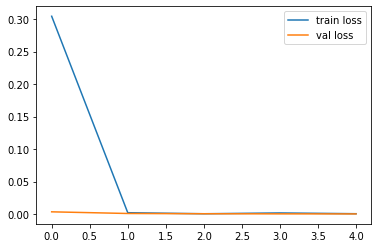

<Figure size 432x288 with 0 Axes>

In [20]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

In [21]:
# face frontend - file run

In [22]:
# Importing the libraries
from PIL import Image
from keras.applications.vgg16 import preprocess_input
import base64
from io import BytesIO
import json
import random
import cv2
from keras.models import load_model
import numpy as np

In [23]:
from keras.preprocessing import image
model = load_model('facefeatures_new_model.h5')

In [24]:
# Loading the cascades
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [27]:
def face_extractor(img):
    # Function detects faces and returns the cropped face
    # If no face detected, it returns the input image
    
    #gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(img, 1.3, 5)
    
    if faces is ():
        return None
    
    # Crop all faces found
    for (x,y,w,h) in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,255),2)
        cropped_face = img[y:y+h, x:x+w]

    return cropped_face

In [ ]:
# Doing some Face Recognition with the webcam
video_capture = cv2.VideoCapture(0)
while True:
    _, frame = video_capture.read()
    #canvas = detect(gray, frame)
    #image, face =face_detector(frame)
    
    face=face_extractor(frame)
    if type(face) is np.ndarray:
        face = cv2.resize(face, (224, 224))
        im = Image.fromarray(face, 'RGB') #convert to RGB scale 
           #Resizing into 128x128 because we trained the model with this image size.
        img_array = np.array(im) 
                    #Our keras model used a 4D tensor, (images x height x width x channel)
                    #So changing dimension 128x128x3 into 1x128x128x3 
        img_array = np.expand_dims(img_array, axis=0) 
        pred = model.predict(img_array)
        print(pred)
                     
        name="None matching"
        
        if(pred[0][3]>0.5):
            name='Ria'
        elif(pred[0][2]>0.5):
            name='Karan'    
        cv2.putText(frame,name, (50, 50), cv2.FONT_HERSHEY_COMPLEX, 1, (0,255,0), 2) 
    else:
        cv2.putText(frame,"No face found", (50, 50), cv2.FONT_HERSHEY_COMPLEX, 1, (0,255,0), 2)
    cv2.imshow('Video', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
video_capture.release()
cv2.destroyAllWindows()

       

#### The various industry segments using and applying facial recognition technologies

1. Security companies are using facial recognition to secure their premises.
2. Immigration checkpoints use facial recognition to enforce smarter border control.
3. Fleet management companies can use face recognition to secure their vehicles.
4. Ride-sharing companies can use facial recognition to ensure the right passengers are picked up by the right drivers.
5. IoT benefits from facial recognition by allowing enhanced security measures and automatic access control at home.
6. Law Enforcement can use facial recognition technologies as one part of AI-driven surveillance systems.
7. Retailers can use facial recognition to customize offline offerings and to theoretically map online purchasing habits with      their online ones.
8. Google incorporates the technology into Google Photos and uses it to sort pictures and automatically tag them based on the      people recognized.

##### Face recognition is an emerging technology that can provide many benefits. Face recognition can save resources and time, and even generate new income streams, for companies that implement it right. It has come a long way in the last twenty years. Today, machines are able to automatically verify identity information for secure transactions, for surveillance and security tasks, and for access control to buildings etc. It’s difficult to be certain. Some experts predict that our faces will replace IDs, passports and credit card pin numbers. Given the fact how convenient and cost-effective this technology is, this prediction is not far-fetched. If this prediction becomes a reality, any company that implemented the technology today might gain a competitive advantage in the future.